# 0. Import Dependencies and Pretrained Model

In [58]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [59]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [60]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [61]:
content_image = load_image('museum.jpg')
style_image = load_image('JapanPanting.jpg')

# 2. Visualize Output

In [62]:
content_image.shape

TensorShape([1, 800, 1370, 3])

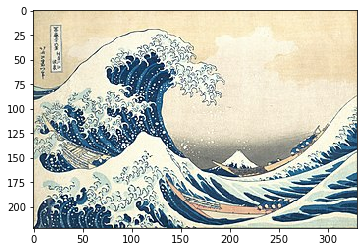

In [63]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [64]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

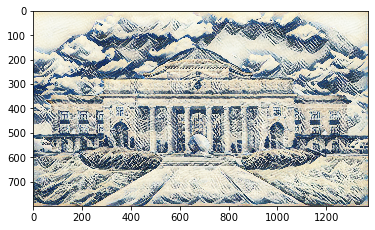

In [65]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [66]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True